In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data_science_week2.csv', index_col = "customerID")
df.shape

(7043, 20)

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df["Churn"].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [7]:
df_0 = df[df['Churn'] ==0]
df_1 = df[df['Churn'] ==1]

In [8]:
columns = df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].columns.to_list()
columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

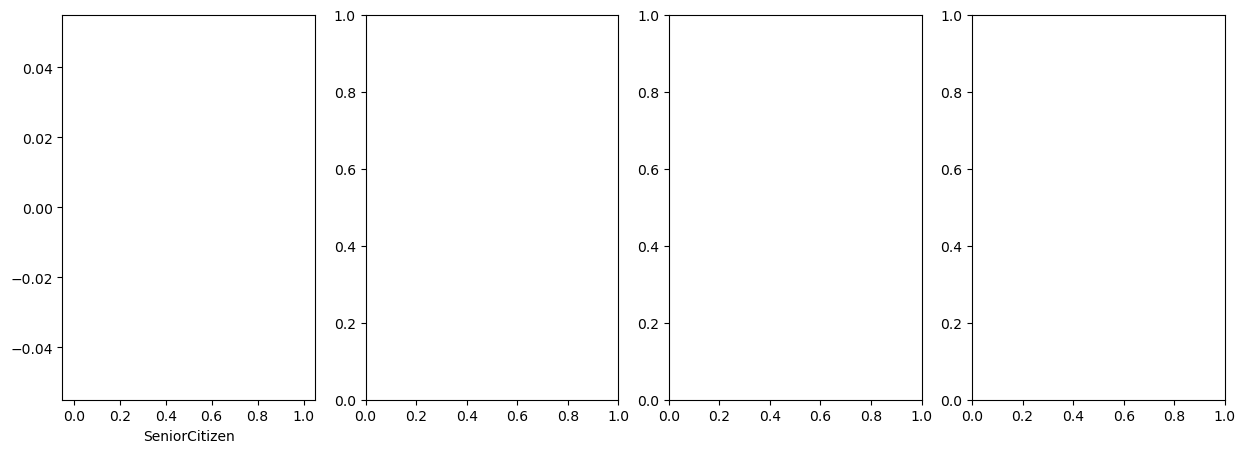

In [121]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15,5))
for i, col_name in enumerate(columns):
    sns.distplot(df_1[col_name], kde = False, bins = 20, ax=axes[i])
    sns.distplot(df_0[col_name], kde = False, bins = 20, ax=axes[i])
    plt.show()

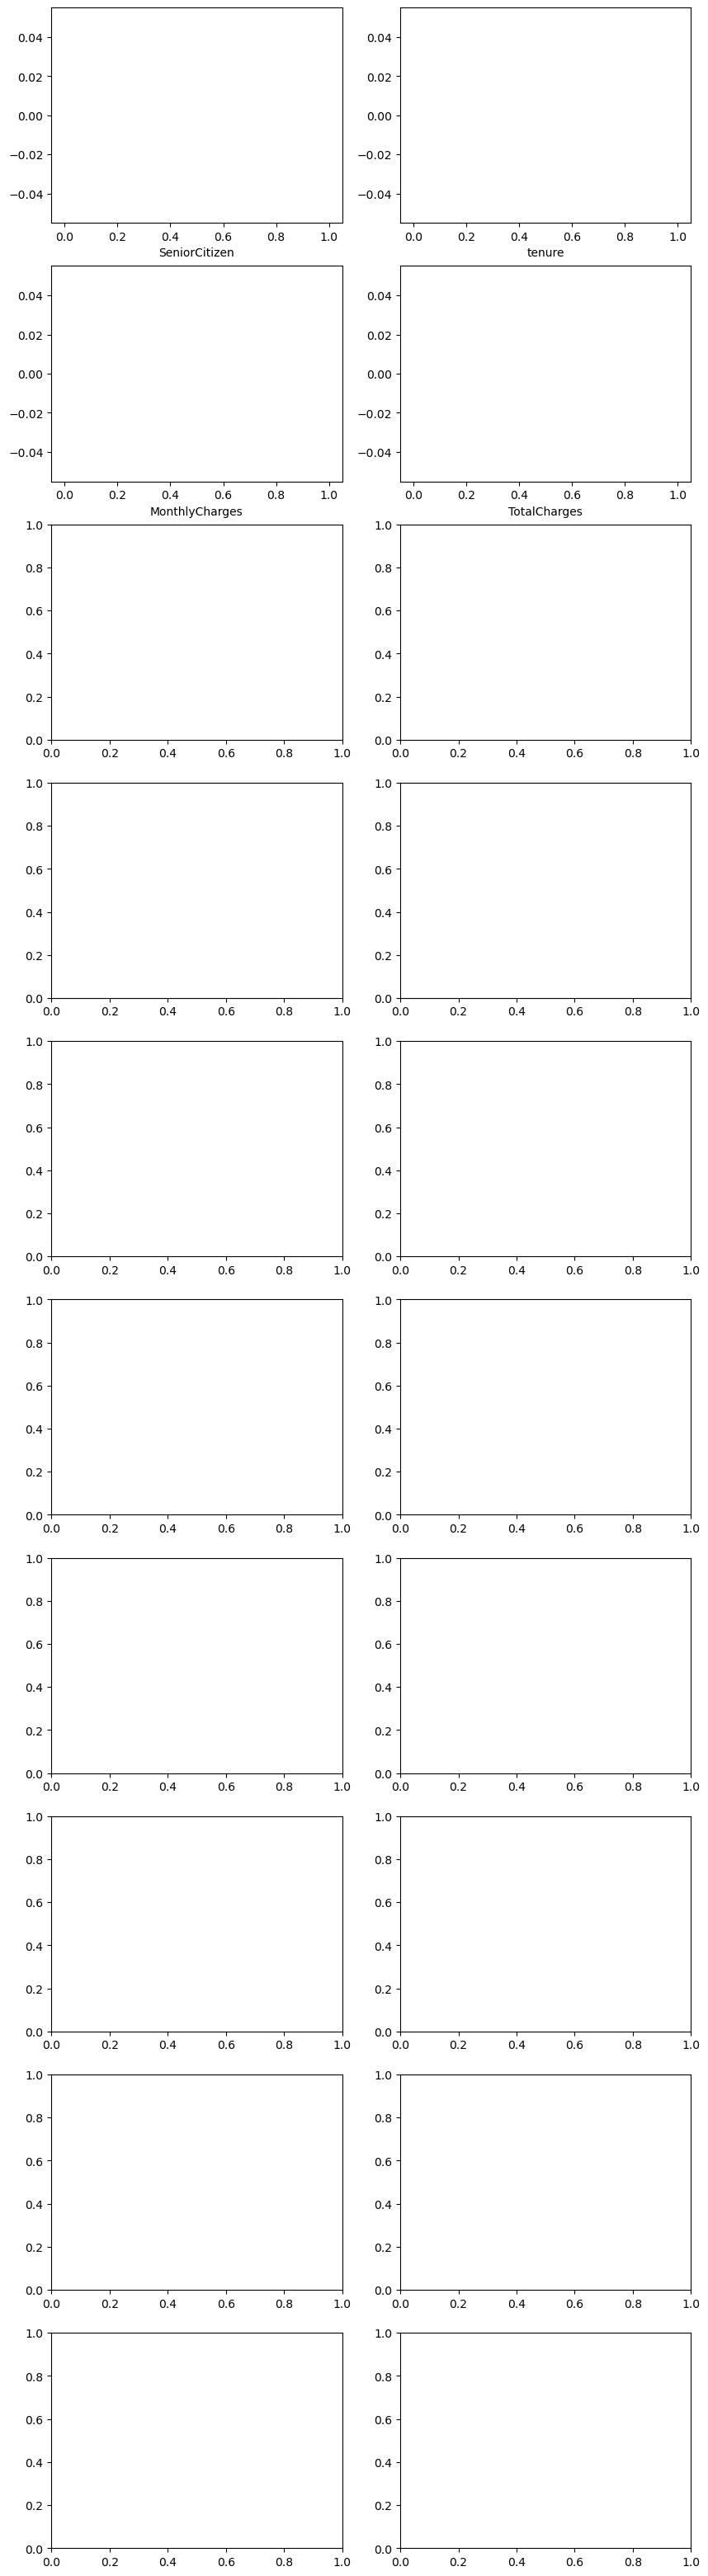

In [15]:
fig, axes = plt.subplots(nrows = 10, ncols = 2, figsize = (10, 40))
for i, col_name in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], kde = False, ax=axes[row][col])
    sns.distplot(df_1[col_name], kde = False, ax=axes[row][col])

<Axes: xlabel='SeniorCitizen', ylabel='count'>

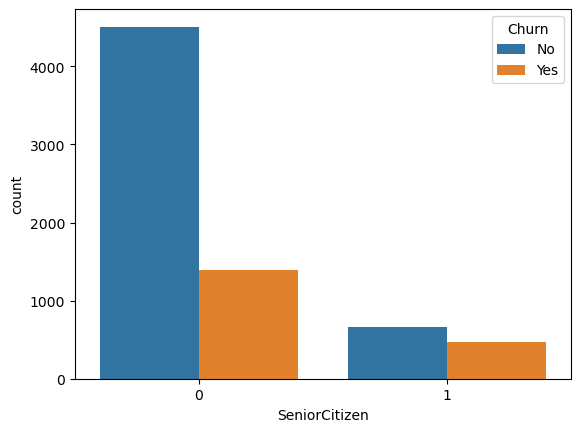

In [11]:
sns.countplot( x = df['SeniorCitizen'], hue = df['Churn'])

C:\Users\ltm75\anaconda3\Lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='SeniorCitizen'>

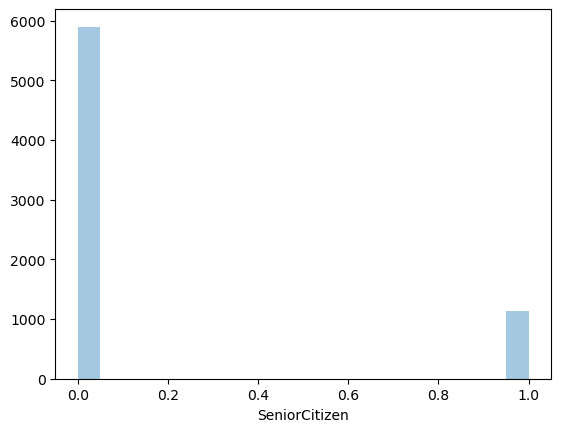

In [17]:
sns.distplot(df['SeniorCitizen'], kde = False, bins = 20)